In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno

from sklearn.feature_extraction.text import CountVectorizer

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")
train.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


<AxesSubplot:>

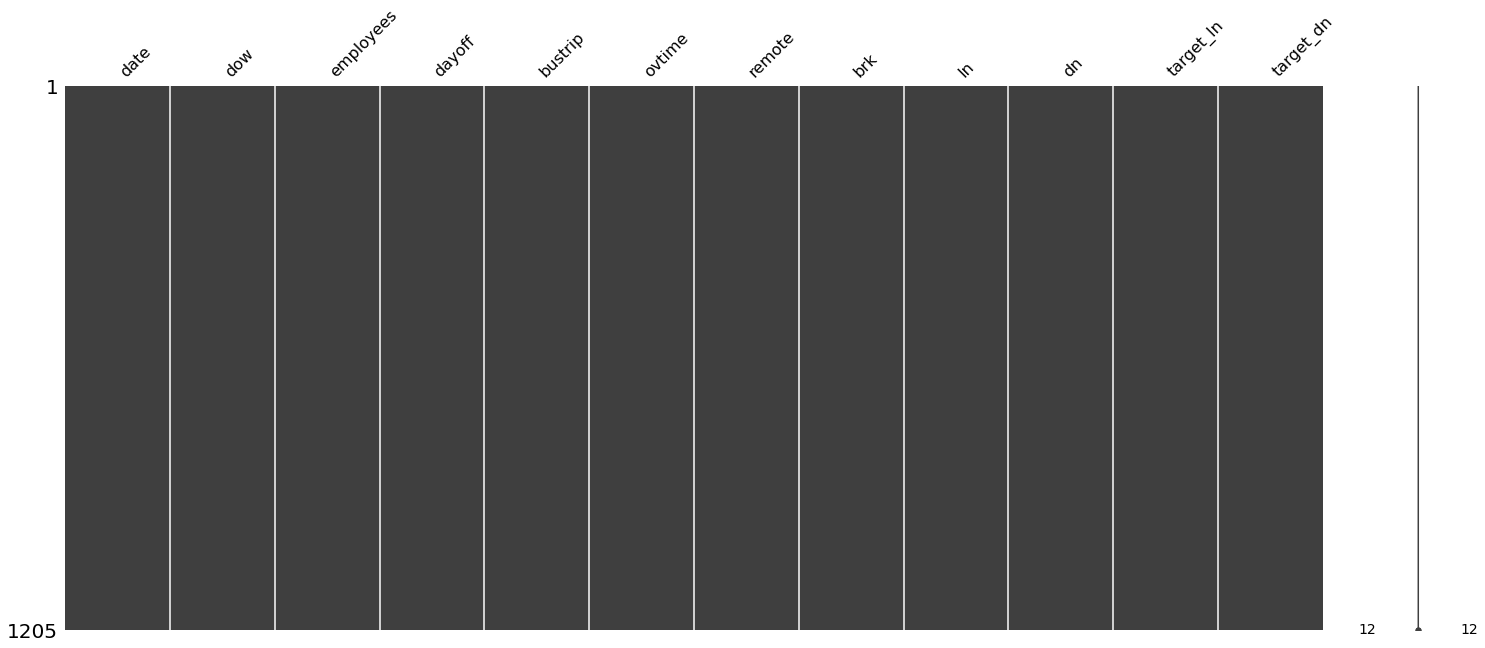

In [31]:
missingno.matrix(train)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1205 non-null   datetime64[ns]
 1   dow        1205 non-null   object        
 2   employees  1205 non-null   int64         
 3   dayoff     1205 non-null   int64         
 4   bustrip    1205 non-null   int64         
 5   ovtime     1205 non-null   int64         
 6   remote     1205 non-null   float64       
 7   brk        1205 non-null   object        
 8   ln         1205 non-null   object        
 9   dn         1205 non-null   object        
 10  target_ln  1205 non-null   float64       
 11  target_dn  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.1+ KB


In [145]:

train.columns = ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'ln', 'dn', 'target_ln', 'target_dn']
test.columns= ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'ln', 'dn']

<AxesSubplot:xlabel='target_dn', ylabel='Density'>

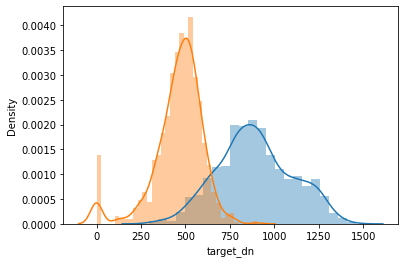

In [19]:
# 단순 히스토 그램 
sns.distplot(train['target_ln'])
sns.distplot(train['target_dn'])

- 석식계는 0이 많아 보임 
- 중식계와 석식계 모두 정규분포의 형태를 띔

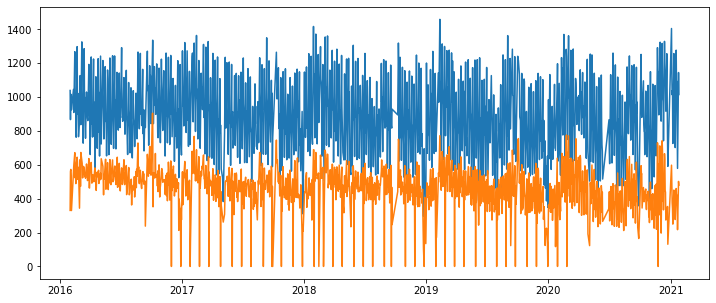

In [29]:
# 추세선
train['date'] = pd.to_datetime(train['date'])

plt.figure(figsize=(12, 5))
plt.plot(train['date'], train['target_ln'])
plt.plot(train['date'],train['target_dn'])

- 코로나 전후로 달라보이지는 않음
- 대신 중식 및 석식의 경우 주기적으로 이용 수가 낮아지는 것을 확인 (특히 석식은 그 주기가 짧은 듯 근데 그 주기가 2020 들어서는 안 보임) 

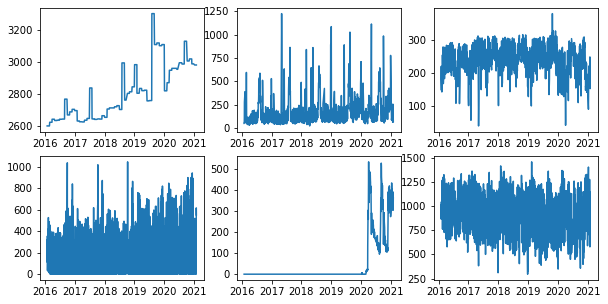

In [47]:
fig, ax  = plt.subplots(2,3,figsize=(10,5))

ax[0][0].plot(train['date'], train['employees'])
ax[0][1].plot(train['date'], train['dayoff'])
ax[0][2].plot(train['date'], train['bustrip'])
ax[1][0].plot(train['date'], train['ovtime'])
ax[1][1].plot(train['date'], train['remote'])
ax[1][2].plot(train['date'], train['target_ln'])

- 정원이 크게 는 것으로 보임
- remote 도 코로나 이후 크게 증가함 
- 정기적으로 dayoff 가 많은 날 확인

<AxesSubplot:>

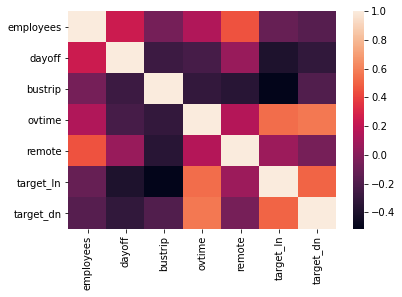

In [51]:
corr = train.corr()
sns.heatmap(corr)

- overtime과 target_dn, target_ln이 유사해 보임
- target_ln과 target_dn이 유사해 보임 => target_ln을 먼저 예측한 후 이걸 변수로 써서 또 target_dn을 예측해 볼 수 있지 않을까?

In [58]:
train.loc[train['target_dn']==0,['dn']]

,dn
204,*
224,*
244,*
262,*
281,*
306,*
327,자기계발의날
346,*자기계발의날*
366,가정의날
392,*


- 자기개발의 날 수요일이 많네

In [64]:
train['worker_lunch'] = train['employees'] - train['dayoff'] - train['bustrip'] - train['remote']

corr= train.corr()
display(corr)

,employees,dayoff,bustrip,ovtime,remote,target_ln,target_dn,worker_lunch
employees,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852,0.503771
dayoff,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894,-0.552661
bustrip,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164,0.136389
ovtime,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168,0.309118
remote,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534,-0.150393
target_ln,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,0.286810
target_dn,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,0.172373
worker_lunch,0.503771,-0.552661,0.136389,0.309118,-0.150393,0.286810,0.172373,1.000000


<AxesSubplot:>

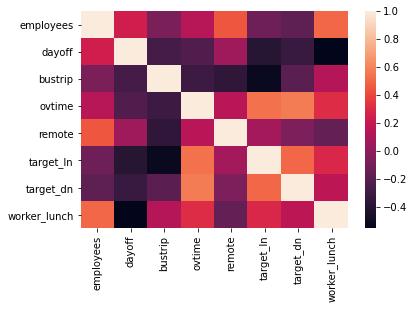

In [77]:
sns.heatmap(corr)

- 실 근로자 수를 반영해도 더 높은 상관관계를 보이거나 하지는 않는 듯

In [76]:
 train.groupby(train['dow']).mean()

,employees,dayoff,bustrip,ovtime,remote,target_ln,target_dn,worker_lunch
dow,,,,,,,,
금,2807.817427,245.078838,273.680498,38.995851,37.278008,653.609959,404.979253,2251.780083
목,2805.815574,137.372951,255.577869,379.545082,42.389344,823.991803,480.401639,2370.475410
수,2805.690377,113.092050,241.405858,8.209205,45.652720,905.213389,363.615063,2405.539749
월,2812.049793,174.742739,204.190871,483.767635,45.518672,1144.331950,538.933610,2387.597510
화,2807.712500,119.004167,230.637500,457.308333,46.737500,925.620833,520.129167,2411.333333


In [79]:
train.columns

Index(['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote',
       'brk', 'ln', 'dn', 'target_ln', 'target_dn', 'worker_lunch'],
      dtype='object')

In [88]:
lunch = []
for i in range(len(train)):
    temp = train.loc[i,'ln'].split(' ')
    temp = ' '.join(temp).split()  
    
    search = '('   # 원산지 정보는 삭제
    for menu in temp:
        if search in menu:
            temp.remove(menu)
    
    lunch.append(temp) 
print(lunch)

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'], ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절임', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '꽃게탕', '돈육굴소스볶음', '옥수수전', '유채나물', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '시금치국', '닭감자조림', '연두부*양념장', '콩나물무침', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '쇠고기무국', '탕수어', '오징어숙회무침', '취나물', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '냉이된장국', '쇠고기장조림', '통도라지구이', '치커리무침', '요구르트', '포기김치'], ['낙지비빔밥', '유부장국', '고구마치즈구이', '해초무침', '요구르트', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '대구찌개', '마늘간장치킨', '새송이버섯볶음', '돌나물무침/치킨무', '요구르트', '포기김치'], ['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', '파래김*양념장', '부럼/요구르트', '포기김치'], ['쌀밥/잡곡밥', '콩나물국', '돈육간장볶음', '버섯잡채', '꽃상추무침', '요구르트', '포기김치'], ['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', '포기김치'], ['쌀밥/잡곡밥', '북어계란국', '닭갈비', '새싹두부구이', '곰

In [117]:
# lunch train data에 메뉴명별 칼럼 만들기 (밥, 국, 반찬1-3)
bob = []; gook = []; banchan1 = []; banchan2 = []; banchan3 = []; kimchi = []; side = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan1_tmp = day_menu[2]; banchan1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; banchan2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; banchan3.append(banchan3_tmp)

    if i < 1067:
        kimchi_tmp = day_menu[-1]; kimchi.append(kimchi_tmp)
        side_tmp = day_menu[-2]; side.append(side_tmp)
    else: 
        kimchi_tmp = day_menu[-2]; kimchi.append(kimchi_tmp)
        side_tmp  = day_menu[-1]; side.append(side_tmp)

train_ln = train[['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'ln', 'target_ln']]
train_ln['bob'] = bob
train_ln['gook'] = gook
train_ln['banchan1'] = banchan1; train_ln['banchan2'] = banchan2; train_ln['banchan3'] = banchan3
train_ln['kimchi'] = kimchi 
train_ln['side'] = side

In [107]:
train_ln.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,ln,target_ln,bob,gook,banchan1,banchan2,banchan3,kimchi,side
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,포기김치,요구르트
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,배추겉절이,요구르트


In [108]:
train_ln['bob'].value_counts()

쌀밥/잡곡밥         879
쌀밥/흑미밥/찰현미밥     74
콩나물밥            23
카레덮밥            18
나물비빔밥           15
              ... 
파인애플볶음밥          1
새우날치알볶음밥         1
산채비빔밥*강된장        1
삼계탕              1
쌀밥/팥밥/찰현미밥       1
Name: bob, Length: 75, dtype: int64

In [110]:
train_ln.loc[train_ln['bob'].str.contains('/'),['bob']].value_counts()

bob          
쌀밥/잡곡밥           879
쌀밥/흑미밥/찰현미밥       74
쌀밥/수수밥/찰현미밥       10
쌀밥/차조밥/찰현미밥        6
쌀밥/찰보리밥/찰현미밥       5
쌀밥/기장밥/찰현미밥        5
쌀밥/오곡밥             4
쌀밥/검정콩밥/찰현미밥       4
쌀밥/귀리밥/찰현미밥        3
쌀밥/보리밥/찰현미밥        2
쌀밥/렌틸콩밥/찰현미밥       2
김치볶음밥/계란           1
쌀밥/                1
쌀밥/강낭콩밥/찰현미밥       1
열무보리비빔밥/강된장        1
쌀밥/병아리콩/찰현미밥       1
쌀밥/병아리콩밥/찰현미밥      1
쌀밥/옛날돈까스           1
쌀밥/완두콩밥/찰현미밥       1
쌀밥/치자밥/찰현미밥        1
쌀밥/팥밥/찰현미밥         1
(쌀밥/찰현미밥)          1
dtype: int64

In [118]:
train_ln.loc[train_ln['bob'].str.contains('/'),['bob']]=1
train_ln.loc[train_ln['bob']!=1,['bob']]=0

In [119]:
train_ln['bob']=train_ln['bob'].astype('int32')
train_ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1205 non-null   datetime64[ns]
 1   dow        1205 non-null   object        
 2   employees  1205 non-null   int64         
 3   dayoff     1205 non-null   int64         
 4   bustrip    1205 non-null   int64         
 5   ovtime     1205 non-null   int64         
 6   remote     1205 non-null   float64       
 7   ln         1205 non-null   object        
 8   target_ln  1205 non-null   float64       
 9   bob        1205 non-null   int32         
 10  gook       1205 non-null   object        
 11  banchan1   1205 non-null   object        
 12  banchan2   1205 non-null   object        
 13  banchan3   1205 non-null   object        
 14  kimchi     1205 non-null   object        
 15  side       1205 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1)

<AxesSubplot:>

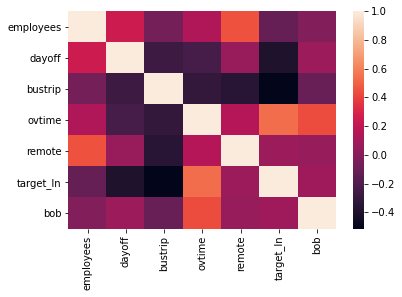

In [120]:
corr = train_ln.corr()
sns.heatmap(corr)

In [95]:
train_ln['gook'].value_counts()

맑은국         46
콩나물국        44
된장찌개        37
어묵국         31
아욱국         28
            ..
우묵콩국         1
건새우무채국       1
경상도식소고기국     1
김치우동         1
고사리육개장       1
Name: gook, Length: 272, dtype: int64

In [97]:
train_ln['banchan1'].value_counts()

오징어볶음         32
닭갈비           30
버섯불고기         29
훈제오리구이        27
돈육굴소스볶음       25
              ..
열기어구이          1
훈제오리구이/쌈무      1
돈사태김치찜         1
오징어볶음&소면사리     1
오징어숙회무침        1
Name: banchan1, Length: 391, dtype: int64

In [98]:
train_ln['banchan2'].value_counts()

계란말이          27
새송이버섯전        24
계란찜           24
우엉잡채          18
메추리알조림        18
              ..
깐풍두부           1
비엔나컬리플라워볶음     1
모듬소시지볶음        1
쫄면             1
꽁치와사비구이        1
Name: banchan2, Length: 465, dtype: int64

In [99]:
train_ln['banchan3'].value_counts()

오이무침         34
콩나물무침        28
숙주나물         24
무생채          22
시금치나물        19
             ..
매운어묵볶음        1
쌈추겉절이/핫도그     1
풋고추*양파        1
양배추쌈*양념장      1
파프리카감자채볶음     1
Name: banchan3, Length: 447, dtype: int64

In [153]:
set1 = list(train_ln['banchan1'].unique())
set2 = list(train_ln['banchan2'].unique())
set3 = list(train_ln['banchan3'].unique())

In [154]:
print(len(set1))

391


In [156]:
set1.extend(set2)
set1.extend(set3)
set_train = set(set1)

In [150]:
lunch = []
for i in range(len(test)):
    temp = test.loc[i,'dn'].split(' ')
    temp = ' '.join(temp).split()  
    
    search = '('   # 원산지 정보는 삭제
    for menu in temp:
        if search in menu:
            temp.remove(menu)
    
    lunch.append(temp) 
print(lunch)

# lunch train data에 메뉴명별 칼럼 만들기 (밥, 국, 반찬1-3)
bob = []; gook = []; banchan1 = []; banchan2 = []; banchan3 = []; kimchi = []; side = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan1_tmp = day_menu[2]; banchan1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; banchan2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; banchan3.append(banchan3_tmp)


    kimchi_tmp = day_menu[-2]; kimchi.append(kimchi_tmp)
    side_tmp  = day_menu[-1]; side.append(side_tmp)

test_ln = test[['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'ln']]
test_ln['bob'] = bob
test_ln['gook'] = gook
test_ln['banchan1'] = banchan1; test_ln['banchan2'] = banchan2; test_ln['banchan3'] = banchan3
test_ln['kimchi'] = kimchi 
test_ln['side'] = side

[['흑미밥', '얼큰순두부찌개', '쇠고기우엉볶음', '버섯햄볶음', '포기김치'], ['충무김밥', '우동국물', '오징어무침', '꽃맛살샐러드', '얼갈이쌈장무침', '석박지'], ['흑미밥', '물만둣국', '카레찜닭', '숯불양념꼬지어묵', '꼬시래기무침', '포기김치'], ['흑미밥', '동태탕', '돈육꽈리고추장조림', '당면채소무침', '모자반무침', '포기김치'], ['흑미밥', '바지락살국', '쇠고기청경채볶음', '두부구이*볶은김치', '머위된장무침', '백김치'], ['오므라이스', '가쓰오장국', '빌소세지구이*구운채소', '단감치커리무침', '양념고추지', '겉절이김치'], ['흑미밥', '계란파국', '돈육두루치기', '감자채파프리카볶음', '세발나물오리엔탈무침', '포기김치'], ['유부초밥/추가밥', '온메밀소바', '국물떡볶이', '순대찜*소금', '청경채겉절이', '포기김치'], ['흑미밥', '냉이국', '반반치킨', '꼬막채소무침', '청경채찜', '포기김치'], ['흑미밥', '미역국', '매운소불고기', '단호박두부탕수', '메추리알장조림', '석박지'], ['흑미밥', '참치김치찌개', '오징어굴소스볶음', '차돌비빔국수', '건새우무나물', '포기김치'], ['흑미밥', '순두부백탕', '수제치킨까스', '쫄면채소무침', '얼갈이나물', '포기김치'], ['흑미밥', '손수제비국', '쇠고기낙지볶음', '카레홍합찜', '쑥갓나물', '포기김치'], ['곤드레밥', '황태국', '찰떡떡갈비조림', '계란후라이', '재래김*달래양념장', '무생채'], ['흑미밥', '바지락된장찌개', '제육볶음', '양배추숙*쌈장', '노가리고추조림', '겉절이김치'], ['흑미밥', '버섯들깨탕', '아귀콩나물찜', '콤비네이션피자', '돌나물&된장소스', '포기김치'], ['흑미밥', '동태알탕', '깐풍육', '고사리볶음', '오이무침', '포기김치'], ['흑미밥', '쇠고기무국', '춘전닭갈비', '뉴욕핫도그', '유채나물된장

In [157]:
set1 = list(test_ln['banchan1'].unique())
set2 = list(test_ln['banchan2'].unique())
set3 = list(test_ln['banchan3'].unique())

set1.extend(set2)
set1.extend(set3)
set_test = set(set1)

In [159]:
set_test - set_train

{'가지탕수',
 '감귤쥬스',
 '건새우무나물',
 '계란후라이',
 '고사리볶음',
 '국물떡볶이',
 '꼬막채소무침',
 '꼬시래기무침',
 '납작군만두*장',
 '노가리고추조림',
 '뉴욕핫도그',
 '단감치커리무침',
 '단무지채무침',
 '단호박두부탕수',
 '닭살채소굴소스볶음',
 '도토리묵채소무침',
 '돈육꽈리고추장조림',
 '돌나물&된장소스',
 '두부구이*볶은김치',
 '라볶이',
 '마파두부소스',
 '매운감자조림',
 '매운사태조림',
 '매콤돈육메추리알장조림',
 '매콤어묵볶음',
 '메추리알곤약장조림',
 '메추리알장조림',
 '모둠채소전*장',
 '모자반무침',
 '미나리숙주나물',
 '미나리전',
 '반반치킨',
 '배추흑임자무침',
 '버섯맛살볶음',
 '버섯햄볶음',
 '빌소세지구이*구운채소',
 '사천탕수육',
 '삼치구이*와사비장',
 '삼치엿장구이',
 '생선까스*타르타르D',
 '세발나물오리엔탈무침',
 '소떡소떡',
 '쇠고기들깨소스무침',
 '쇠고기우엉볶음',
 '쇠고기청경채볶음',
 '쇠고기탕수',
 '쇠미역쌈*강된장',
 '수제두부동그랑땡',
 '수제연근유자피클',
 '수제오이피클',
 '수제찹쌀꿔바로우',
 '수제치킨까스',
 '순대찜*소금',
 '숯불양념꼬지어묵',
 '쑥갓무침',
 '쑥갓생무침',
 '씨앗콩자반',
 '알리오올리오',
 '알배기,케일숙쌈*쌈장',
 '양념고추지',
 '양배추숙*쌈장',
 '양상추,',
 '양파장아찌',
 '얼갈이쌈장무침',
 '오징어무침',
 '오징어어묵무침',
 '왕만두찜*양념장',
 '유채나물된장무침',
 '재래김*달래양념장',
 '적어양념구이',
 '짜사이볶음',
 '쭈꾸미불고기',
 '참나물초장무침',
 '채소계란찜',
 '청경채찜',
 '춘권*타르타르D',
 '춘전닭갈비',
 '치킨까스김치나베',
 '카레찜닭',
 '카레홍합찜',
 '코다리무조림',
 '코코뱅',
 '콤비네이션피자',
 '콩나물간장볶음',
 '크래미오이보트샐러드',
 '해물우동볶음',
 '해초배무침'

In [164]:
set(list(test_ln['bob'].unique()))-set(list(train_ln['bob'].unique()))

{'곤드레밥',
 '꽁보리밥*볶음고추장',
 '단호박카레라이스',
 '베이컨김치볶음밥',
 '샐러드김밥',
 '셀프충무김밥',
 '쇠고기규동덮밥',
 '애플카레라이스',
 '오므라이스',
 '오므라이스/추가밥',
 '유부초밥/추가밥',
 '추가밥',
 '충무김밥',
 '해물짜장면',
 '흑미밥',
 '흑미밥/미니팥칼국수'}

In [165]:
set(list(test_ln['gook'].unique()))-set(list(train_ln['gook'].unique()))

{'가쓰오장국',
 '냉이국',
 '냉이김칫국',
 '달래된장찌개',
 '닭칼국수',
 '돈육고추장찌개',
 '맑은버섯국',
 '매운족발볶음',
 '물만둣국',
 '바지락된장찌개',
 '바지락살국',
 '뼈해장국',
 '사골파국*소면사리',
 '손수제비국',
 '순두부백탕',
 '스팸김치찌개',
 '애호박새우젓국',
 '온메밀소바',
 '우동국물',
 '짬뽕*생면',
 '짬뽕수제비'}

In [166]:
set(list(test_ln['kimchi'].unique()))-set(list(train_ln['kimchi'].unique()))

{'감귤쥬스',
 '건새우무나물',
 '고들빼기무침',
 '꼬시래기무침',
 '꽃맛살샐러드',
 '노가리고추조림',
 '단무지무침',
 '단무지채무침',
 '돌나물&된장소스',
 '머위된장무침',
 '메추리알장조림',
 '모자반무침',
 '미나리숙주나물',
 '배추흑임자무침',
 '버섯햄볶음',
 '상추무침',
 '세발나물오리엔탈무침',
 '솎음열무나물',
 '수제연근유자피클',
 '수제오이피클',
 '쑥갓나물',
 '쑥갓무침',
 '쑥갓생무침',
 '씨앗콩자반',
 '알배기,케일숙쌈*쌈장',
 '양념고추지',
 '양파장아찌',
 '얼갈이나물',
 '얼갈이쌈장무침',
 '연근조림',
 '열무나물무침',
 '오복지무침',
 '오이무침',
 '유채나물된장무침',
 '유채나물무침',
 '재래김*달래양념장',
 '짜사이볶음',
 '쪽파무침',
 '참나물생채무침',
 '참나물초장무침',
 '청경채겉절이',
 '청경채나물',
 '청경채찜',
 '취나물무침',
 '치커리무침',
 '치커리사과무침',
 '해초배무침'}

In [167]:
set(list(test_ln['side'].unique()))-set(list(train_ln['side'].unique()))

{'겉절이김치', '김치볶음', '백김치', '얼갈이열무겉절이', '열무김치', '포기김치'}

In [171]:
from collections import Counter 

def detect_outliers(df, n, features): 
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
        
    return multiple_outliers 

Outliers_to_drop = detect_outliers(train, 2, ["target_ln","target_dn"])



In [172]:
Outliers_to_drop

[]